Let us assume that, this model can be predicted using a Decision Tree classifier.
First, loading the data and looking into it

In [40]:
import pandas as pd
IS_LOCAL = False
import os
if(IS_LOCAL):
    PATH="../input/heart.csv"
else:
    PATH="../input/"
print(os.listdir(PATH))

ds = pd.read_csv(PATH+'/heart.csv')
ds.head()

['heart.csv']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
#importing some useful libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now that we,ve seen how the data is distributed, we'll try to plot some histograms to understand better the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c88665ac8>]],
      dtype=object)

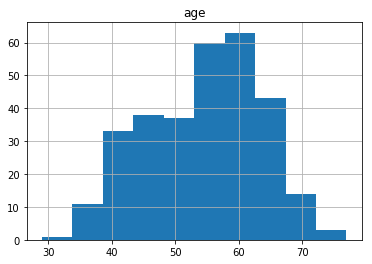

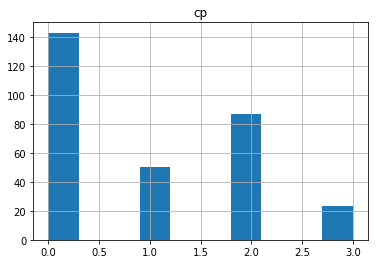

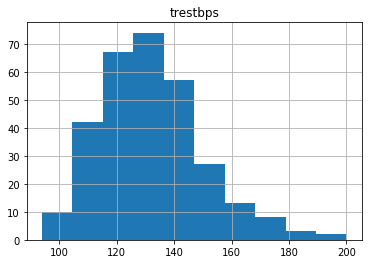

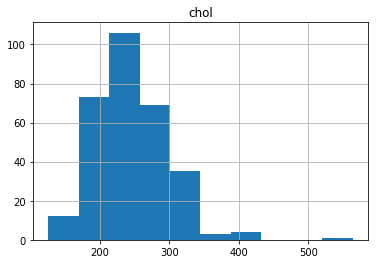

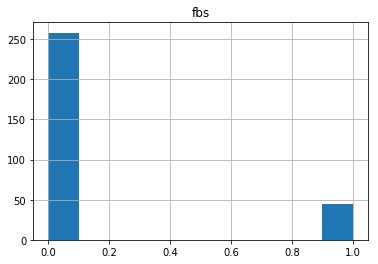

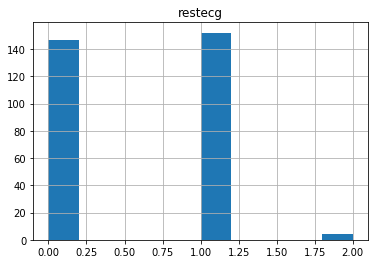

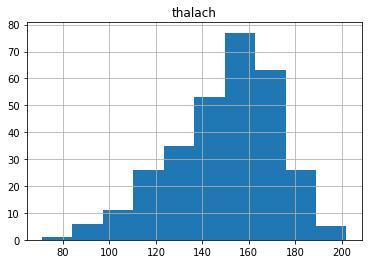

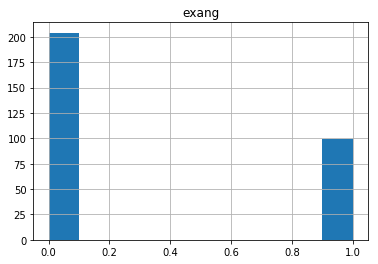

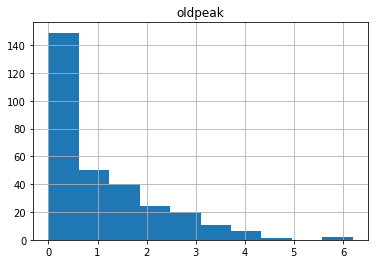

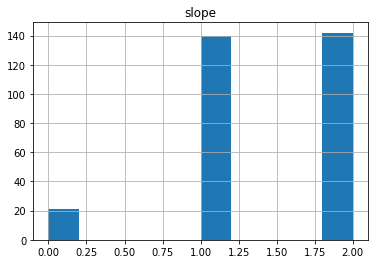

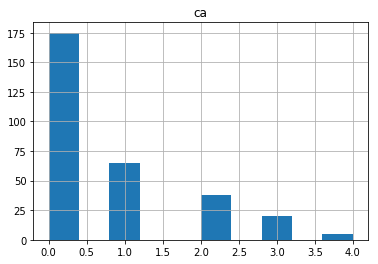

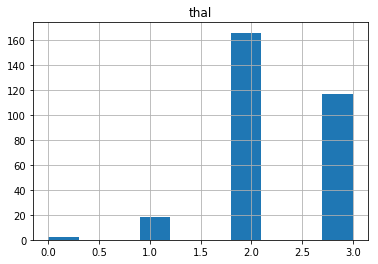

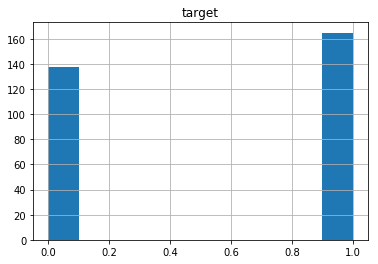

In [42]:
ds.hist('age')
ds.hist('cp')
ds.hist('trestbps')
ds.hist('chol')
ds.hist('fbs')
ds.hist('restecg')
ds.hist('thalach')
ds.hist('exang')
ds.hist('oldpeak')
ds.hist('slope')
ds.hist('ca')
ds.hist('thal')
ds.hist('target')


Let's see the correlation matrix, to better comprehension about how connected and if we can disconsider some data (in fact I didn't disconsider any data in this notebook, but in my tests I've ignored "chol" and "tbs" data, but the accuracy have decreased near to 61%)

In [43]:
matrix = ds.corr()
matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [44]:
targets = ds.pop('target').values
discard_data = ds.pop('fbs')
X = ds.values


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=.3, random_state=30)


from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[29, 11],
       [13, 38]])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import graphviz
from sklearn.tree import export_graphviz

dot_data  = export_graphviz(classifier, feature_names=ds.columns, class_names=['Saudavel', 'Doente'])
graph = graphviz.Source(dot_data)
graph

from joblib import dump, load

dump(classifier, 'classifier_001')

new_classifier = load('classifier_001')

new_classifier.score(X_test, y_test)



              precision    recall  f1-score   support

           0       0.69      0.72      0.71        40
           1       0.78      0.75      0.76        51

   micro avg       0.74      0.74      0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



0.7362637362637363